In [2]:
import requests
import nltk

In [3]:
juliusURLString = "https://www.gutenberg.org/cache/epub/1522/pg1522.txt"
r = requests.get(juliusURLString,allow_redirects=True)
jText = r.text

In [4]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [5]:
sent = sent_tokenize(jText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)

In [6]:
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
myStopWords = list(punctuation+ '’') + stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
wordsNotInStop = []
for word in words:
    if word not in myStopWords:
        wordsNotInStop.append(word)

In [8]:
from nltk.stem import WordNetLemmatizer
juliusWords = [WordNetLemmatizer().lemmatize(w) for w in wordsNotInStop]

In [9]:
from collections import Counter
import pandas as pd
df = pd.DataFrame.from_dict(Counter(juliusWords),orient="index").reset_index().rename(columns={'index':'word',0:'count'})
dfMean = df['count'].mean()
dfMode = df['count'].mode() #returned as a pandas series object with length one so we just have to index the 0th element
dfMedian = df['count'].median()
print("this is the mean: " + str(dfMean))
print("this is the mode: " + str(dfMode[0]))
print("this is the median: " + str(dfMedian))

this is the mean: 4.306478873239437
this is the mode: 1
this is the median: 1.0


In [10]:
df2 = df.sort_values(by='count',ignore_index=True).copy()
trimmedMean = df2.loc[int(0.1*3550):int(0.9*3550),'count'].mean()
print("this is the trimmed mean: " + str(trimmedMean))
# I trimmed with top 10% and the last 10% such that we can get the middle 80% of values
# I've noticed that the distribution of words is very skewed as there are a lot of words
# with a frequency of 1 but there are a handful of words have 400+ occurrences
# Therefore, it makes sense that the mean is lowered because these higher skewed frequencies are removed

this is the trimmed mean: 2.034142907426962


<AxesSubplot:title={'center':'Frequency of Word Occurences in Julius Ceasar'}, ylabel='Frequency'>

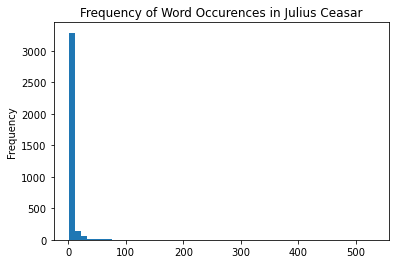

In [45]:
df['count'].plot(kind='hist',bins=50, xlabel='word occurences',title='Frequency of Word Occurences in Julius Ceasar')
# examining the histogram, we see that most of the values that occur are less than 100
# this makes sense as around 2000 out of the 3500 entries in the word frequency counter
# have a frequency of 1. 
# the mean falls in this range but is raised because of the 1 or 2 words that have a frequency
# of over 400
# the mode and the median are at 1 which makes sense seeing how many occurences of a single
# frequency there are
# the trimmed mean which removes both 10% of 1's as well as the much higher occuring words
# shifts closer to the mean and mode which also is consistent with the demographic of our data

In [50]:
jSD = df['count'].std()
j25 = df['count'].quantile(0.25)
j75 = df['count'].quantile(0.75)
print("this is the standard deviation: " + str(jSD))
print("this is the 25% quantile: " + str(j25))
print("this is the 75% quantile: " + str(j75))
print("this is the interquartile range: " + str(j75-j25))
# the standard deviation being relatively high makes sense because of how varied our data becomes
# with the higher numbers
# the interquartile range giving us an estimation of the middle half of the dataset is 2 whch is consistent
# with our previous findings. Over 50% of the data frequencies have a value of 1 so it would make sense that
# our middle range would be a value close to that (2)

this is the standard deviation: 13.988569086393422
this is the 25% quantile: 1.0
this is the 75% quantile: 3.0
this is the interquartile range: 2.0


In [77]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

['DESCR', 'data', 'data_filename', 'feature_names', 'frame', 'target', 'target_filename']


In [53]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [60]:
for c in features_df.columns:
    print("column name: " + c)
    print("mean: " + str(features_df[c].mean()))
    print("median: " + str(features_df[c].mean()))
    print("mode: " + str(features_df[c].mean()))

column name: age
mean: -3.6342849293088766e-16
median: -3.6342849293088766e-16
mode: -3.6342849293088766e-16
column name: sex
mean: 1.3083425745511955e-16
median: 1.3083425745511955e-16
mode: 1.3083425745511955e-16
column name: bmi
mean: -8.045349203335693e-16
median: -8.045349203335693e-16
mode: -8.045349203335693e-16
column name: bp
mean: 1.2816545210746291e-16
median: 1.2816545210746291e-16
mode: 1.2816545210746291e-16
column name: s1
mean: -8.835315586242054e-17
median: -8.835315586242054e-17
mode: -8.835315586242054e-17
column name: s2
mean: 1.327024211984792e-16
median: 1.327024211984792e-16
mode: 1.327024211984792e-16
column name: s3
mean: -4.574646342983182e-16
median: -4.574646342983182e-16
mode: -4.574646342983182e-16
column name: s4
mean: 3.777301498233299e-16
median: 3.777301498233299e-16
mode: 3.777301498233299e-16
column name: s5
mean: -3.8308542173050264e-16
median: -3.8308542173050264e-16
mode: -3.8308542173050264e-16
column name: s6
mean: -3.412882015081407e-16
median:

In [67]:
import numpy as np
for c in features_df.columns:
    print("column: " + c)
    print(np.corrcoef(features_df[c],target_df))
# looking at the output we see that the 'bmi' column has the highest correlation coefficient

column: age
[[1.         0.18788875]
 [0.18788875 1.        ]]
column: sex
[[1.       0.043062]
 [0.043062 1.      ]]
column: bmi
[[1.         0.58645013]
 [0.58645013 1.        ]]
column: bp
[[1.         0.44148385]
 [0.44148385 1.        ]]
column: s1
[[1.         0.21202248]
 [0.21202248 1.        ]]
column: s2
[[1.         0.17405359]
 [0.17405359 1.        ]]
column: s3
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
column: s4
[[1.         0.43045288]
 [0.43045288 1.        ]]
column: s5
[[1.         0.56588343]
 [0.56588343 1.        ]]
column: s6
[[1.         0.38248348]
 [0.38248348 1.        ]]


<AxesSubplot:xlabel='bmi', ylabel='targets'>

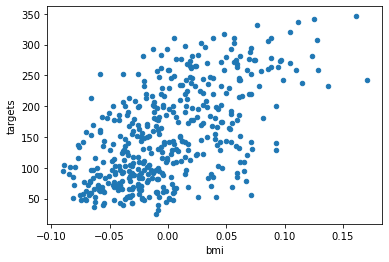

In [83]:
df2 = pd.DataFrame(data = {'targets':df.target,'bmi':df.data['bmi']})
df2.plot(kind='scatter',x='bmi',y='targets')
# the correlation coefficient for comparing the columns against each other is .586
# we can see a general trend towards a positive y=x resembling line. However, there
# are a decent amount of points that don't follow this trend which justifies why the correlation
# score is not a perfect 1. A general +1 trend can be seen but since there are so many 
# outlying points the score is dropped. Also, since the points go from bottom left to top right
# instead of top left to bottom right, it makes sense that the coefficient is a positive value

In [96]:
from sklearn.linear_model import LinearRegression
bmiLi = df2[['bmi']]
targetLi = df2['targets']
reg = LinearRegression().fit(bmiLi,targetLi)

In [97]:
print(reg.coef_)

[949.43526038]


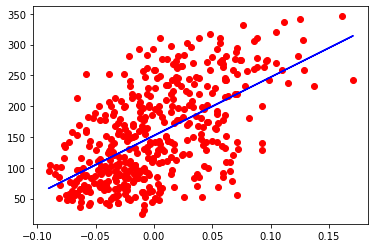

In [99]:
import matplotlib.pyplot as plt
y_train = reg.intercept_ + reg.coef_*bmiLi
plt.plot(bmiLi,targetLi,'ro',bmiLi,y_train,'b-')

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print("This is the means squared error: " + str(mean_squared_error(targetLi,y_train)))
print("This is the r2 score: " + str(r2_score(targetLi, y_train)))

This is the means squared error: 3890.4565854612724
This is the r2 score: 0.3439237602253803


In [105]:
df3 = pd.DataFrame(data= {"sex":df.data['sex'],"targets":df.target})
sexLi = df3[['sex']]
reg = LinearRegression().fit(sexLi,targetLi)
new_y_train = reg.intercept_ + reg.coef_*sexLi
print("This is the new mean squared error: " + str(mean_squared_error(targetLi,new_y_train)))
print("This is the new r2 score: " + str(r2_score(targetLi,new_y_train)))
# I took a new column that had the lowest correlation coefficient value (sex compared to target values) 
# The mean squared error value increased by over 2000 and the r2 score decreased around a factor of .01

This is the new mean squared error: 5918.888899586022
This is the new r2 score: 0.0018543357106460823
